In [1]:
"""
Script: stellar_atmosphere.py
Author: Djamil Lakhdar-Hamina
Date: 03/29/2023

"""

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

G=6.67e-11
M_sun=1.989e+30
V=lambda r: 4*np.pi/3*r**3

## read in data, select subset 
stellar_atmosphere=pd.read_csv("stellar_atmosphere.csv",names=['i','r','t','rho','kappa'])
stellar_atmosphere=stellar_atmosphere[['r','t','rho','kappa']]
print('\n\n\n the data table in general:')
print(stellar_atmosphere)

## apply volume function to each data point 
stellar_atmosphere['V']=list(map(V,stellar_atmosphere.r))

## subtract data point volume by previous data point volume to get dV
stellar_atmosphere['delta_V']=stellar_atmosphere.V.diff(-1).fillna(0)

## multiply each data point by its respective dV 
M=stellar_atmosphere.delta_V*stellar_atmosphere.rho
print('\n\n the mass of each shell is:')
print(M)




 the data table in general:
              r           t           rho      kappa
0   710076400.0       0.000  0.000000e+00   0.000000
1   709324400.0    3379.636  2.163524e-08  24.801190
2   709254100.0    3573.309  3.028525e-08  26.723810
3   709178300.0    3826.212  4.206871e-08  27.377030
4   709095900.0    4133.144  5.814973e-08  27.087650
5   709006200.0    4488.020  8.015188e-08  26.255650
6   708908500.0    4887.027  1.103146e-07  25.170040
7   708801900.0    5329.075  1.517126e-07  23.994740
8   708685600.0    5815.187  2.085648e-07  22.811580
9   708558800.0    6347.784  2.866621e-07  21.656110
10  708420500.0    6930.293  3.939580e-07  20.546860
11  708269700.0    7568.856  5.413734e-07  19.488230
12  708105200.0    8262.201  7.439096e-07  18.481310
13  707925900.0    9021.603  1.022171e-06  17.525130
14  707730300.0    9850.881  1.404459e-06  16.617850
15  707516900.0   10756.420  1.929644e-06  15.757310
16  707284300.0   11745.200  2.651111e-06  14.941280
17  707030600.0

The suns total Mass M can be approximated by any $M_r$  (mass up to radius r, contained within sphere of r) where R>r (R being the radius of the star) because the density is so much lower in the atmosphere than in for the star itself. Therefore, any contributions made by the shell of mass added on by the atmospheric shell $\Delta R$ is orders of magnitude less than the mass contained in the star. We can therefore *approximate* the mass of the star as the mass inside the sun $M_R$ where R is the radius of the star , plus a much smaller contribution $M_{R->r}$ where the smaller contribution is all the mass from shell from R to radius r i.e $M_R$ $\approx$ $M_{R->r}$.


Left-Handed Sum Pressure at bottommost rung: 2671111.4025830147


Right-Handed Sum Pressure at bottommost rung: -2897714.1380020995



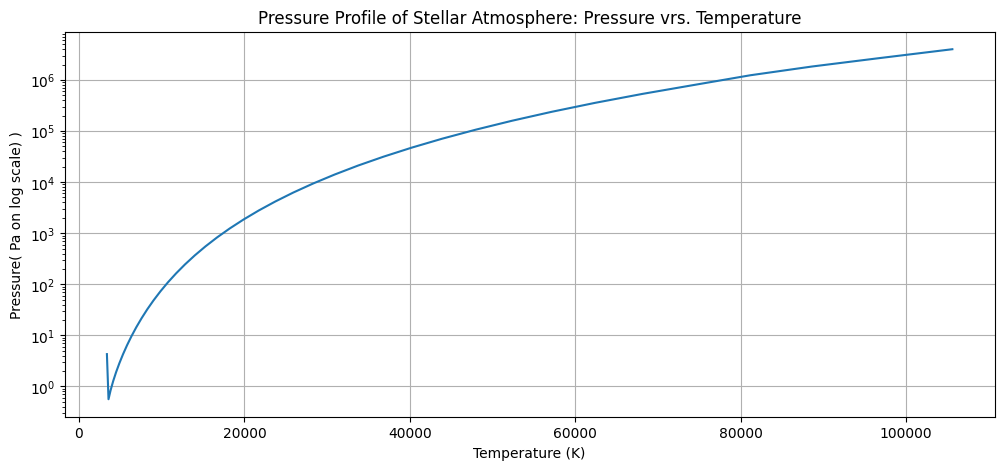

In [26]:
## left side sum, take the f(r0) * (r1-r0)
P=-(stellar_atmosphere.rho*G*(M_sun))/stellar_atmosphere.r**2*stellar_atmosphere.r.diff()
P_right=-(stellar_atmosphere.rho*G*(M_sun))/stellar_atmosphere.r**2*stellar_atmosphere.r.diff(-1)

print(f"\nLeft-Handed Sum Pressure at bottommost rung: {P[40]}\n")
print(f"\nRight-Handed Sum Pressure at bottommost rung: {P_right[40]}\n")

## plot the results 
plt.figure(figsize=(12,5))
plt.plot(stellar_atmosphere.t,P)  
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure( Pa on log scale) )')
plt.title('Pressure Profile of Stellar Atmosphere: Pressure vrs. Temperature')
plt.grid('--')
plt.show()

We choose to use a logarithmic scale because in using such a scale we better reveal the relationship between temperature and pressure. The pressure varies widely from zero to quantities of the order $10^6$, while the temperature varies solely by factors of 10. To better focus on variation or changes of pressure with respect to temperature, throughout the interval of temperatures, it helps to plot pressure in log scale to display the data in a more compact fashion. However, if we were to plot both pressure and temperature in log scale this would oversimplify the relatioship and cause there to seem to be a simple linear relationship between pressure and temperature.


In [5]:
print(stellar_atmosphere.delta_V)

0     4.759681e+24
1     4.444388e+23
2     4.791112e+23
3     5.207119e+23
4     5.667054e+23
5     6.170845e+23
6     6.731039e+23
7     7.341217e+23
8     8.001264e+23
9     8.723667e+23
10    9.508259e+23
11    1.036746e+24
12    1.129473e+24
13    1.231500e+24
14    1.342792e+24
15    1.462684e+24
16    1.594273e+24
17    1.736875e+24
18    1.892311e+24
19    2.061756e+24
20    2.245747e+24
21    2.444804e+24
22    2.662552e+24
23    2.898212e+24
24    3.154726e+24
25    3.431884e+24
26    3.733170e+24
27    4.059530e+24
28    4.413096e+24
29    4.795316e+24
30    5.209412e+24
31    5.655433e+24
32    6.138247e+24
33    6.657683e+24
34    7.217110e+24
35    7.818510e+24
36    8.465489e+24
37    9.157805e+24
38    9.899209e+24
39    1.069194e+25
40    1.153614e+25
41    0.000000e+00
Name: delta_V, dtype: float64


In [21]:
-(stellar_atmosphere.rho*G*(M_sun))/stellar_atmosphere.r**2*stellar_atmosphere.r.diff(-1)

0    -0.000000e+00
1    -4.010402e-01
2    -6.054207e-01
3    -9.143999e-01
4    -1.376229e+00
5    -2.066659e+00
6    -3.104348e+00
7    -4.659209e+00
8    -6.985760e+00
9    -1.047614e+01
10   -1.570470e+01
11   -2.355191e+01
12   -3.529112e+01
13   -5.292702e+01
14   -7.938318e+01
15   -1.189526e+02
16   -1.783697e+02
17   -2.673604e+02
18   -4.008025e+02
19   -6.009371e+02
20   -9.008556e+02
21   -1.349879e+03
22   -2.023788e+03
23   -3.033047e+03
24   -4.546372e+03
25   -6.811925e+03
26   -1.020789e+04
27   -1.529505e+04
28   -2.291606e+04
29   -3.432812e+04
30   -5.142605e+04
31   -7.701205e+04
32   -1.153414e+05
33   -1.726931e+05
34   -2.585258e+05
35   -3.869431e+05
36   -5.791197e+05
37   -8.664252e+05
38   -1.341858e+06
39   -1.988255e+06
40   -2.897714e+06
41             NaN
dtype: float64

In [20]:
stellar_atmosphere.r.diff()

0           NaN
1     -752000.0
2      -70300.0
3      -75800.0
4      -82400.0
5      -89700.0
6      -97700.0
7     -106600.0
8     -116300.0
9     -126800.0
10    -138300.0
11    -150800.0
12    -164500.0
13    -179300.0
14    -195600.0
15    -213400.0
16    -232600.0
17    -253700.0
18    -276600.0
19    -301600.0
20    -328900.0
21    -358600.0
22    -390800.0
23    -426100.0
24    -464400.0
25    -506200.0
26    -551500.0
27    -600900.0
28    -654600.0
29    -713000.0
30    -776400.0
31    -845400.0
32    -920100.0
33   -1001400.0
34   -1089400.0
35   -1184800.0
36   -1288100.0
37   -1400100.0
38   -1521000.0
39   -1651700.0
40   -1792900.0
41   -1945000.0
Name: r, dtype: float64